#  2015 Fall Term: Web Analytics IS 620
    
## Week Three - Network Analysis: Graph Theory, Definitions

### Author: Partha Banerjee

In [1]:
%matplotlib inline

import Tkinter, tkFileDialog, csv, sys
import networkx as nx
import matplotlib.pyplot as plt
g=nx.Graph()

#### 1. Load a graph database of your choosing from a text file or other source.  If you take a large network dataset from the web (such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges.

In [2]:
try:
    # Read datafile name with path
    input_file = tkFileDialog.askopenfilename()
    
    # This input file has downloaded from https://snap.stanford.edu/data/ca-GrQc.html
    # Directed graph (each unordered pair of nodes is saved once): CA-GrQc.txt 
    # Collaboration network of Arxiv General Relativity category (there is an edge if authors coauthored at least one paper)
    # Nodes: 5242 Edges: 28980

    #input_file = "C:\\Partho\\MSDA\\Dropbox\\IS 620 Web Analytics\Wk 3 - Network Analysis Graph Theory, Definitions\\CA-GrQc.csv"

    # Read file
    fromNode = []
    toNode = []
    with open(input_file, "r") as fl:
        allrecs = csv.reader(fl)
        next(allrecs, None)             # Skip header
        try:
            count = 0
            for row in allrecs:
                # Keep it small, take only 500 records
                if (count==500):
                    break
                if row[0] not in fromNode:
                    fromNode.append(row[0])
                    g.add_node(row[0])
                if row[1] not in toNode:
                    toNode.append(row[1])
                    g.add_node(row[1])
                g.add_edge(row[0],row[1])
                count += 1
        except csv.Error as er:
            sys.exit('File %s, line %d: %s' % (input_file, allrecs.line_num, er))
            exit(-1)
        except IndexError:
            print "Data Error, exiting..."
            exit(1)

    # Take only unique data values
    fromNode = set(fromNode)
    toNode = set(toNode)
    
    N = len(fromNode)
    if N > 0:
        print "Total fromNode in datafile %s: %d" % (input_file, len(fromNode))
        print "Total toNode in datafile  %s: %d" % (input_file, len(toNode))
        print
    else:
        print "Datafile has no fromNode data in it, Exiting..."
except IOError:
    # User presses Cancel button instead of selecting a file
    print "Sorry, you have aborted File selection option!!!"

Total fromNode in datafile C:/Partho/MSDA/Dropbox/IS 620 Web Analytics/Wk 3 - Network Analysis Graph Theory, Definitions/CA-GrQc-WO-desc.csv: 32
Total toNode in datafile  C:/Partho/MSDA/Dropbox/IS 620 Web Analytics/Wk 3 - Network Analysis Graph Theory, Definitions/CA-GrQc-WO-desc.csv: 334



In [3]:
fromNode

{'10243',
 '10310',
 '10794',
 '10822',
 '11082',
 '14123',
 '14265',
 '14419',
 '15159',
 '16148',
 '16258',
 '16470',
 '17330',
 '17822',
 '18487',
 '18648',
 '18757',
 '19640',
 '19738',
 '21194',
 '2133',
 '22779',
 '2710',
 '3466',
 '4846',
 '5052',
 '5346',
 '6610',
 '6700',
 '7050',
 '824',
 '8612'}

#### 2. Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 

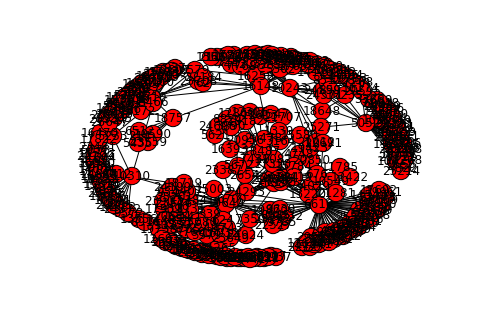

In [4]:
pos=nx.spring_layout(g)
nx.draw(g,pos)
labels=nx.draw_networkx_labels(g,pos)
plt.show()

Readability with label is bad, unable to find ways to resize the graph height/size. So putting the same graph without label below.

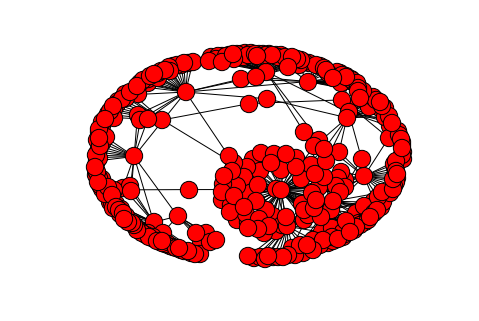

In [5]:
pos=nx.spring_layout(g)
nx.draw(g,pos)
plt.show()

In [6]:
# Now let us check few matrices - starting with the DFS
from networkx import algorithms
from networkx.algorithms import traversal
edges = traversal.dfs_edges(g)
list(edges)

[('21866', '14265'),
 ('14265', '3593'),
 ('14265', '3927'),
 ('14265', '19525'),
 ('14265', '392'),
 ('14265', '2949'),
 ('14265', '22074'),
 ('14265', '23721'),
 ('14265', '5218'),
 ('14265', '19738'),
 ('19738', '14485'),
 ('14485', '6700'),
 ('6700', '339'),
 ('339', '19640'),
 ('19640', '9099'),
 ('19640', '624'),
 ('19640', '25201'),
 ('19640', '9639'),
 ('9639', '6610'),
 ('6610', '17655'),
 ('6610', '6830'),
 ('6610', '22798'),
 ('6610', '18894'),
 ('6610', '24955'),
 ('6610', '12928'),
 ('12928', '2133'),
 ('2133', '18487'),
 ('18487', '17439'),
 ('17439', '4846'),
 ('4846', '22779'),
 ('22779', '14419'),
 ('14419', '19423'),
 ('19423', '10243'),
 ('10243', '8053'),
 ('10243', '8517'),
 ('8517', '18648'),
 ('18648', '15784'),
 ('18648', '16174'),
 ('10243', '22457'),
 ('10243', '16694'),
 ('10243', '6774'),
 ('10243', '8049'),
 ('10243', '21012'),
 ('10243', '15538'),
 ('10243', '11964'),
 ('10243', '22691'),
 ('10243', '10235'),
 ('10235', '5052'),
 ('5052', '16741'),
 ('5052

In [7]:
traversal.dfs_successors(g)

{'10235': ['5052'],
 '10243': ['8053',
  '8517',
  '22457',
  '16694',
  '6774',
  '8049',
  '21012',
  '15538',
  '11964',
  '22691',
  '10235',
  '23452'],
 '10310': ['23855',
  '14982',
  '10841',
  '5233',
  '1854',
  '24372',
  '24814',
  '9572',
  '16310',
  '13056',
  '4583'],
 '10351': ['16258'],
 '11082': ['23382'],
 '12928': ['2133'],
 '14004': ['10822'],
 '14123': ['10351', '10912', '14534', '21705', '17268', '22836', '19783'],
 '14265': ['3593',
  '3927',
  '19525',
  '392',
  '2949',
  '22074',
  '23721',
  '5218',
  '19738',
  '19059',
  '12691',
  '2485',
  '11621',
  '3853',
  '8718',
  '3939',
  '20122',
  '17626',
  '12498',
  '3937',
  '9522',
  '20432',
  '17156',
  '16261',
  '3173',
  '5107',
  '15251',
  '3441',
  '7601',
  '7504',
  '5230',
  '18622',
  '16020',
  '6030'],
 '14419': ['19423', '12422', '21281'],
 '14485': ['6700'],
 '15003': ['8612'],
 '15159': ['20421', '22393'],
 '16148': ['2710',
  '7442',
  '899',
  '5302',
  '17266',
  '24371',
  '3032',
  '

In [8]:
tree = traversal.dfs_tree(g, '10310')
tree.succ

{'10039': {},
 '10235': {'10243': {}},
 '10243': {'11964': {},
  '15538': {},
  '16694': {},
  '22457': {},
  '23452': {},
  '6774': {},
  '8049': {},
  '8053': {},
  '8517': {}},
 '10268': {},
 '10310': {'10841': {},
  '13056': {},
  '14982': {},
  '16310': {},
  '1854': {},
  '23855': {},
  '24372': {},
  '24814': {},
  '3466': {},
  '4583': {}},
 '10351': {},
 '10427': {},
 '10549': {},
 '10550': {},
 '10590': {},
 '10597': {},
 '106': {},
 '10601': {},
 '10822': {},
 '10841': {},
 '10912': {},
 '11082': {'824': {}},
 '11175': {},
 '11241': {},
 '11401': {},
 '11472': {},
 '11604': {},
 '11613': {},
 '11621': {},
 '11785': {},
 '11964': {},
 '12141': {},
 '12306': {},
 '12365': {},
 '12422': {},
 '12496': {},
 '12498': {},
 '12678': {},
 '12691': {},
 '12781': {},
 '12851': {},
 '12860': {},
 '12928': {'2133': {}},
 '12971': {},
 '13026': {},
 '13056': {},
 '13205': {},
 '13220': {},
 '13276': {},
 '1339': {},
 '13556': {},
 '1356': {},
 '13659': {},
 '13989': {},
 '14004': {'10822'

In [9]:
edges = traversal.bfs_edges(g, '10310')
list(edges)

[('10310', '23855'),
 ('10310', '3466'),
 ('10310', '14982'),
 ('10310', '10841'),
 ('10310', '5233'),
 ('10310', '1854'),
 ('10310', '24372'),
 ('10310', '24814'),
 ('10310', '9572'),
 ('10310', '19640'),
 ('10310', '16310'),
 ('10310', '13056'),
 ('10310', '4583'),
 ('3466', '15931'),
 ('3466', '18720'),
 ('3466', '19607'),
 ('3466', '17038'),
 ('3466', '937'),
 ('3466', '8579'),
 ('9572', '19738'),
 ('19640', '339'),
 ('19640', '9099'),
 ('19640', '624'),
 ('19640', '25201'),
 ('19640', '9639'),
 ('19640', '15784'),
 ('19640', '22527'),
 ('19640', '23576'),
 ('19640', '23577'),
 ('19640', '19870'),
 ('19640', '3731'),
 ('19640', '20532'),
 ('19640', '15184'),
 ('19640', '4743'),
 ('19640', '6700'),
 ('19640', '24199'),
 ('19640', '9785'),
 ('19640', '24293'),
 ('19640', '18719'),
 ('19640', '23649'),
 ('19640', '8045'),
 ('19640', '6610'),
 ('19640', '5407'),
 ('19640', '12141'),
 ('8579', '16258'),
 ('19738', '14265'),
 ('19738', '14485'),
 ('19738', '8916'),
 ('19738', '13556'),
 

In [10]:
traversal.bfs_successors(g, '10310')

{'10243': ['8053',
  '22457',
  '16694',
  '6774',
  '8049',
  '15538',
  '11964',
  '10235',
  '23452'],
 '10310': ['23855',
  '3466',
  '14982',
  '10841',
  '5233',
  '1854',
  '24372',
  '24814',
  '9572',
  '19640',
  '16310',
  '13056',
  '4583'],
 '14123': ['20595', '10912', '14534', '21705', '17268', '22836', '19783'],
 '14265': ['3593',
  '21866',
  '3927',
  '19525',
  '392',
  '2949',
  '22074',
  '23721',
  '5218',
  '19059',
  '12691',
  '2485',
  '11621',
  '3853',
  '8718',
  '3939',
  '20122',
  '17626',
  '12498',
  '3937',
  '9522',
  '7350',
  '20432',
  '17156',
  '16261',
  '3173',
  '5107',
  '15251',
  '3441',
  '7601',
  '7504',
  '5230',
  '18622',
  '16020',
  '6030'],
 '14419': ['12422'],
 '15003': ['8612'],
 '15159': ['20421', '22393'],
 '15784': ['18648'],
 '16148': ['2710',
  '7442',
  '5302',
  '17266',
  '3032',
  '22184',
  '13276',
  '62',
  '23708',
  '18757',
  '7383',
  '22415',
  '7768',
  '1765'],
 '16258': ['6825',
  '16676',
  '1727',
  '14123',

In [11]:
traversal.dfs_successors(g, '10310')

{'10235': ['10243'],
 '10243': ['8053',
  '8517',
  '22457',
  '16694',
  '6774',
  '8049',
  '15538',
  '11964',
  '23452'],
 '10310': ['23855',
  '3466',
  '14982',
  '10841',
  '1854',
  '24372',
  '24814',
  '16310',
  '13056',
  '4583'],
 '11082': ['824'],
 '12928': ['2133'],
 '14004': ['10822'],
 '14123': ['20595',
  '10351',
  '10912',
  '14534',
  '6667',
  '4125',
  '21705',
  '10039',
  '17268',
  '2752',
  '22836',
  '19783'],
 '14265': ['3593',
  '21866',
  '3927',
  '19525',
  '392',
  '2949',
  '22074',
  '23721',
  '5218',
  '19738',
  '19059',
  '12691',
  '4743',
  '2485',
  '11621',
  '3853',
  '8718',
  '3939',
  '20122',
  '17626',
  '12498',
  '3937',
  '9522',
  '20432',
  '17156',
  '16261',
  '3173',
  '5107',
  '15251',
  '3441',
  '7601',
  '7504',
  '5230',
  '18622',
  '16020',
  '6030'],
 '14419': ['19423', '12422'],
 '15003': ['8612'],
 '15159': ['20421', '22393'],
 '15784': ['19640'],
 '16148': ['2710',
  '7442',
  '899',
  '5302',
  '17266',
  '24371',
 

In [12]:
algorithms.shortest_path(g,'10310','4472')

['10310', '19640', '6700', '18487', '25271', '5052', '4472']

In [13]:
algorithms.average_shortest_path_length(g)

NetworkXError: Graph is not connected.

The error above is due to all nodes are not connected, perhaps allowing entire dataset might give a result. 

#### 3. Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.

For this section, I am going to use Neo4j. Still I am not sure whether I can put the visual output from Neo4j to my ipython notebook, but time being I will show that through Neo4j dashboard.

In [14]:
from py2neo import Graph, neo4j
from py2neo import Node, Relationship
from networkx.algorithms import traversal

g = Graph()

In [15]:
fromNode = []
toNode = []
with open(input_file, "r") as fl:
    allrecs = csv.reader(fl)
    next(allrecs, None)             # Skip header
    try:
        count = 0
        for row in allrecs:
            # Keep it small, take only 100 records
            if (count==500):
                break
            c1 = Node(name=row[0])
            c2 = Node(name=row[1])
            if row[0] not in fromNode:
                fromNode.append(row[0])
                n1, = g.create(c1)      # Comma unpacks length-1 tuple
            else:
                n1, = g.merge(c1)
            if row[1] not in toNode:
                toNode.append(row[1])
                n2, = g.create(c2)
            else:
                n2, = g.merge(c2)
            g.create(Relationship(n1, "TO", n2))
            count += 1
    except csv.Error as er:
        sys.exit('File %s, line %d: %s' % (input_file, allrecs.line_num, er))
        exit(-1)
    except IndexError:
        print "Data Error, exiting..."
        exit(1)

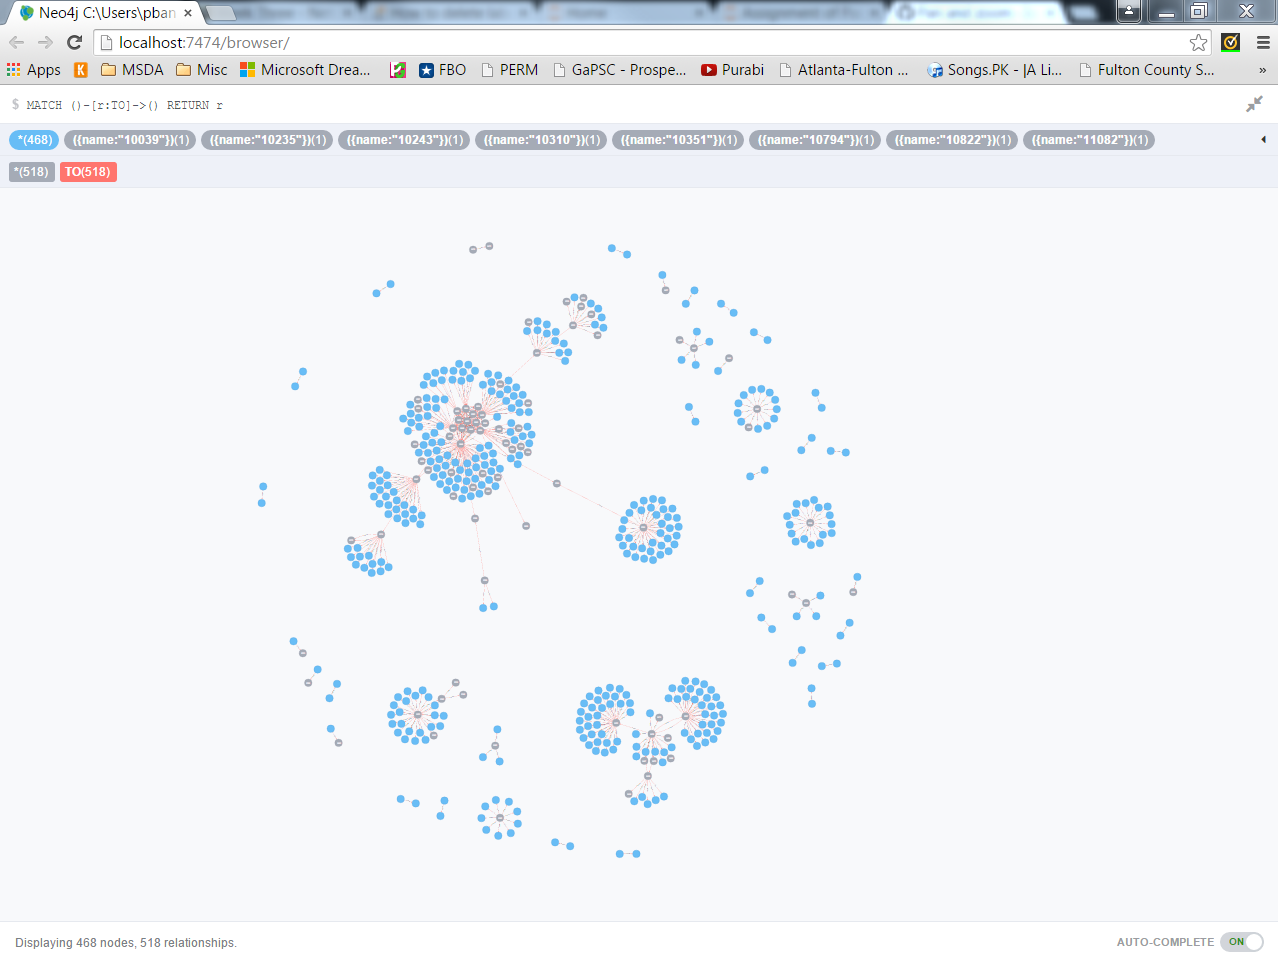

In [16]:
from IPython.display import Image
Image(filename='C:\\Partho\\MSDA\\Dropbox\\IS 620 Web Analytics\Wk 3 - Network Analysis Graph Theory, Definitions\\Neo4j-Output.png') 

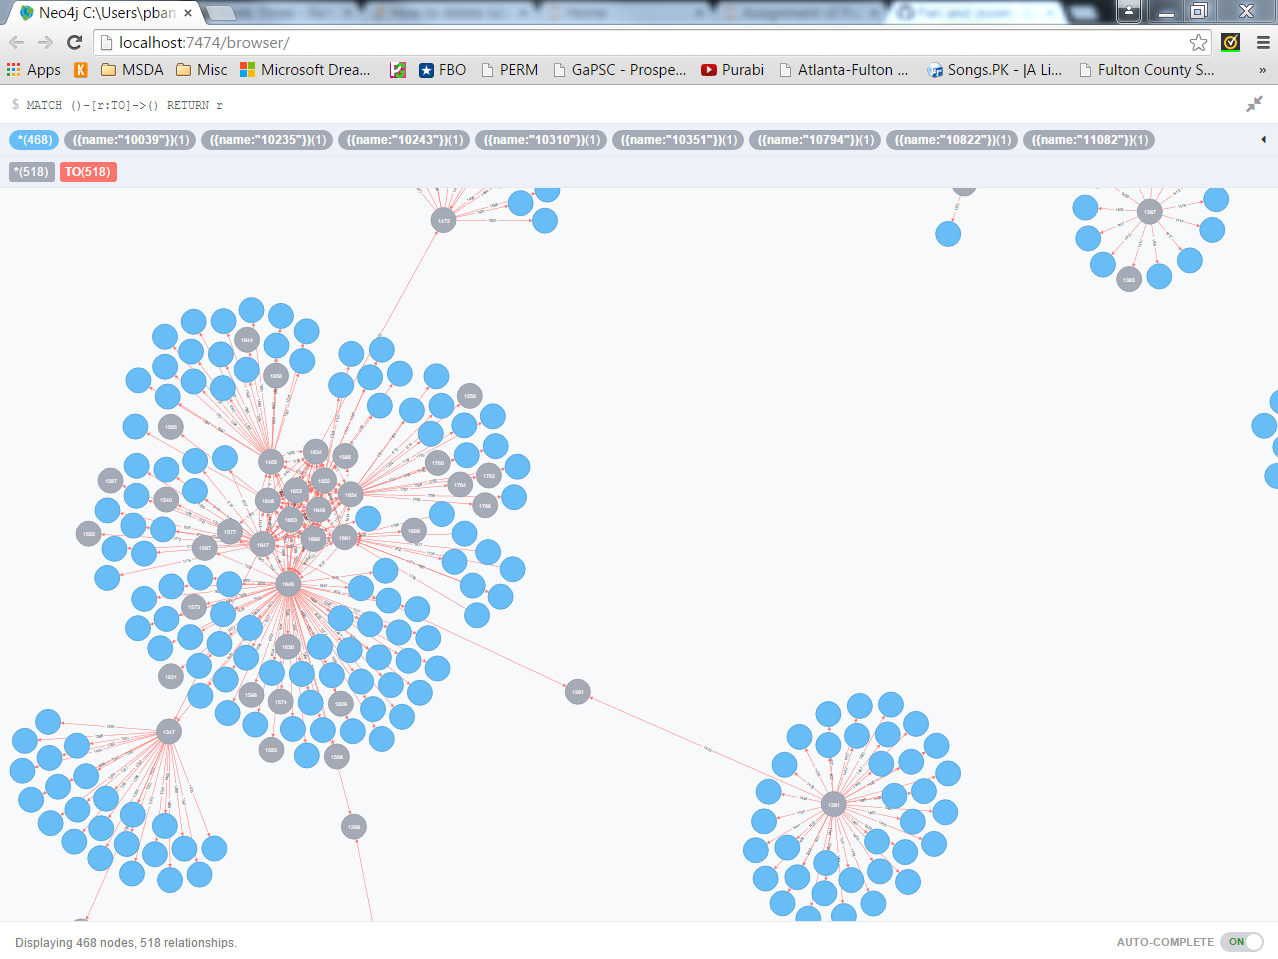

In [17]:
# A 50% zoomed version - shows partial view
Image(filename='C:\\Partho\\MSDA\\Dropbox\\IS 620 Web Analytics\Wk 3 - Network Analysis Graph Theory, Definitions\\Neo4j-Output-zoomed.png') 

This ends my homework, which is now ready to present.